In [1]:
import pandas as pd
import numpy as np
import json
import re
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Make plots a bit bigger by default
plt.rcParams["figure.figsize"] = (10, 5)


Matplotlib is building the font cache; this may take a moment.


In [2]:
DATA_PATH = "output/products.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (10, 15)


,marketplace,product_name,product_url,price_text,price_value,currency,location_city,location_full,specs,description,company_name,contact_person,company_website,gst,scraped_at
0,indiamart,Paper Cup Making Machine,https://www.indiamart.com/proddetail/paper-cup...,"₹ 7,50,000",750000.0,INR,Faridabad,NaN,"{""Automation Grade"": ""Automatic"", ""Item Condit...",PC-950 paper cup machine is improved based on ...,Prakash Machineries Private Limited,Saurabh Gupta,https://www.prakashoffsetmachines.com/,06AABCA0227H1ZA,2025-11-17T10:42:41.181643Z
1,indiamart,Eco Friendly Paper Cup Making Machine,https://www.indiamart.com/proddetail/eco-frien...,"₹ 5,50,000",550000.0,INR,Sonipat,NaN,"{""Production Capacity"": ""50 cups/min"", ""Cup Si...",Advantages : More reliable and durable. It mak...,RSwastik Industries Private Limited,Kartik Gupta,https://www.swastikpapermachine.in/,06AAKCR1990H1Z4,2025-11-17T10:42:41.244592Z
2,indiamart,PVC SMBI-1200 PAPER CUP MAKING MACHINE,https://www.indiamart.com/proddetail/smbi-1200...,"₹ 5,10,000",510000.0,INR,New Delhi,NaN,"{""Production Capacity"": ""More than 500 pieces ...",Type: ZSZB-D100 Cup size: 3-9oz(different size...,Small And Medium Business Industry,A.K. Singh,https://www.smallmediumbusinessindia.com/,07BZSPS9513G1ZP,2025-11-17T10:42:41.314338Z
3,indiamart,Jain Industries 3 Phase Automatic Single PE Pa...,https://www.indiamart.com/proddetail/automatic...,"₹ 6,00,000",600000.0,INR,New Delhi,NaN,"{""Machine Weight"": ""1500 Kg"", ""Automation Grad...",We have established ourselves as an ace manufa...,Jain Industries,Sandeep Jain,https://www.jainpapercupmachine.com/,07AGCPJ5061G1ZN,2025-11-17T10:42:41.369223Z
4,indiamart,Paper Cup Making Machine,https://www.indiamart.com/proddetail/paper-cup...,"₹ 6,75,000",675000.0,INR,New Delhi,NaN,"{""Production Capacity"": ""110 cups/min"", ""Mater...",We are also associated with the well-known ven...,Jai Shree Industries ( Regd.),Pawan Kumar,https://www.jaishreeindustries.in/,07AHHPK3333Q1ZZ,2025-11-17T10:42:41.424609Z


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   marketplace      10 non-null     object 
 1   product_name     10 non-null     object 
 2   product_url      10 non-null     object 
 3   price_text       10 non-null     object 
 4   price_value      10 non-null     float64
 5   currency         10 non-null     object 
 6   location_city    10 non-null     object 
 7   location_full    0 non-null      float64
 8   specs            10 non-null     object 
 9   description      10 non-null     object 
 10  company_name     10 non-null     object 
 11  contact_person   10 non-null     object 
 12  company_website  10 non-null     object 
 13  gst              9 non-null      object 
 14  scraped_at       10 non-null     object 
dtypes: float64(2), object(13)
memory usage: 1.3+ KB


In [4]:
df.isnull().sum()

marketplace         0
product_name        0
product_url         0
price_text          0
price_value         0
currency            0
location_city       0
location_full      10
specs               0
description         0
company_name        0
contact_person      0
company_website     0
gst                 1
scraped_at          0
dtype: int64

In [5]:
df["price_value"] = pd.to_numeric(df["price_value"], errors="coerce")

def parse_specs(s):
    if pd.isna(s):
        return {}
    try:
        return json.loads(s)
    except Exception:
        return {}


df["specs_dict"] = df["specs"].apply(parse_specs)

df[
    ["product_name", "price_text", "price_value", "location_city", "location_full"]
].head()

,product_name,price_text,price_value,location_city,location_full
0,Paper Cup Making Machine,"₹ 7,50,000",750000.0,Faridabad,NaN
1,Eco Friendly Paper Cup Making Machine,"₹ 5,50,000",550000.0,Sonipat,NaN
2,PVC SMBI-1200 PAPER CUP MAKING MACHINE,"₹ 5,10,000",510000.0,New Delhi,NaN
3,Jain Industries 3 Phase Automatic Single PE Pa...,"₹ 6,00,000",600000.0,New Delhi,NaN
4,Paper Cup Making Machine,"₹ 6,75,000",675000.0,New Delhi,NaN


In [6]:
df.describe()

,price_value,location_full
count,10.000000,0.0
mean,636500.000000,NaN
std,91044.860737,NaN
min,510000.000000,NaN
25%,562500.000000,NaN
50%,625000.000000,NaN
75%,686250.000000,NaN
max,790000.000000,NaN


In [7]:
df.describe(include="object")

,marketplace,product_name,product_url,price_text,currency,location_city,specs,description,company_name,contact_person,company_website,gst,scraped_at,specs_dict
count,10,10,10,10,10,10,10,10,10,10,10,9,10,10
unique,1,9,10,8,1,6,10,10,10,10,10,9,10,10
top,indiamart,Paper Cup Making Machine,https://www.indiamart.com/proddetail/paper-cup...,"₹ 5,50,000",INR,New Delhi,"{""Automation Grade"": ""Automatic"", ""Item Condit...",PC-950 paper cup machine is improved based on ...,Prakash Machineries Private Limited,Saurabh Gupta,https://www.prakashoffsetmachines.com/,06AABCA0227H1ZA,2025-11-17T10:42:41.181643Z,"{'Automation Grade': 'Automatic', 'Item Condit..."
freq,10,2,1,2,10,4,1,1,1,1,1,1,1,1


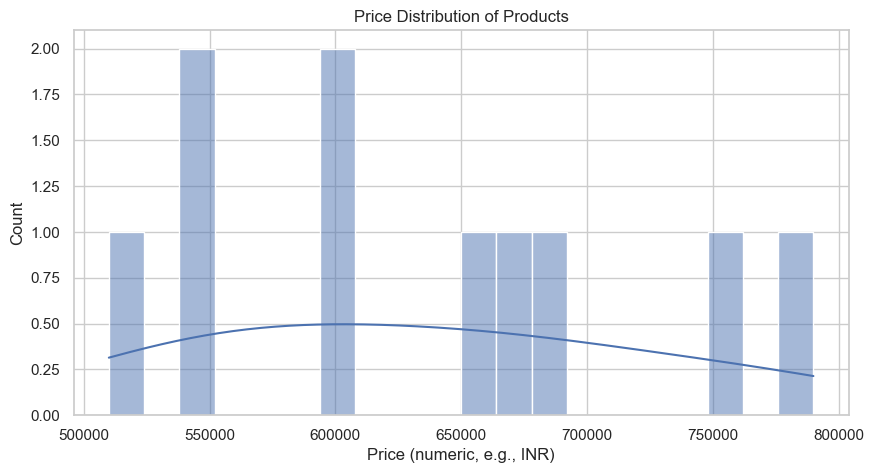

In [8]:
price_series = df["price_value"].dropna()

plt.figure()
sns.histplot(price_series, bins=20, kde=True)
plt.title("Price Distribution of Products")
plt.xlabel("Price (numeric, e.g., INR)")
plt.ylabel("Count")
plt.show()

In [9]:
city_counts = df["location_city"].value_counts().head(10)
city_counts

location_city
New Delhi        4
Faridabad        2
Sonipat          1
Muzaffarnagar    1
Jaipur           1
Coimbatore       1
Name: count, dtype: int64

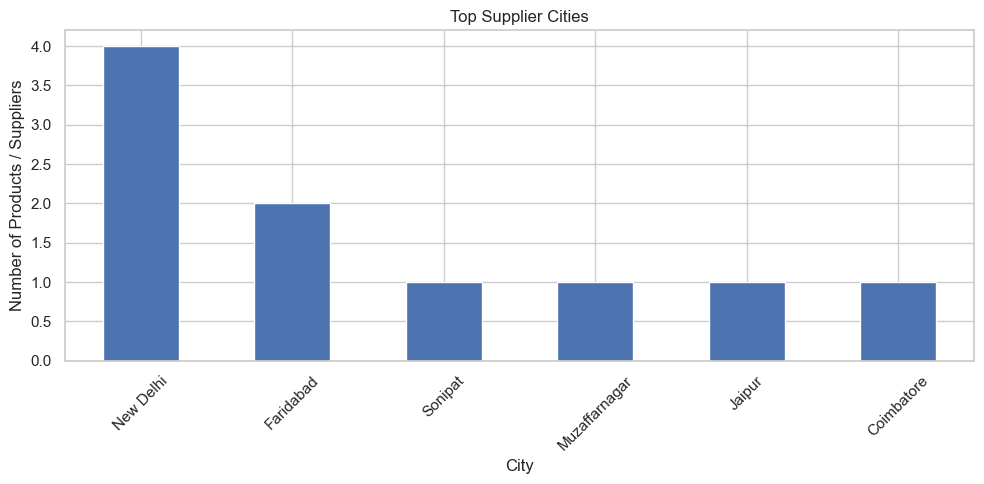

In [10]:
plt.figure()
city_counts.plot(kind="bar")
plt.title("Top Supplier Cities")
plt.xlabel("City")
plt.ylabel("Number of Products / Suppliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
all_words = []

for name in df["product_name"].dropna():
    tokens = re.findall(r"\w+", name.lower())
    all_words.extend(tokens)

word_counts = Counter(all_words)

stopwords = {"and", "the", "for", "with", "of", "in", "a", "an", "to", "by", "on"}
filtered = [(w, c) for w, c in word_counts.items() if w not in stopwords]

common_words = sorted(filtered, key=lambda x: x[1], reverse=True)[:15]
common_words

[('paper', 10),
 ('cup', 10),
 ('machine', 10),
 ('making', 7),
 ('automatic', 3),
 ('forming', 3),
 ('3', 2),
 ('phase', 2),
 ('pe', 2),
 ('eco', 1),
 ('friendly', 1),
 ('pvc', 1),
 ('smbi', 1),
 ('1200', 1),
 ('jain', 1)]

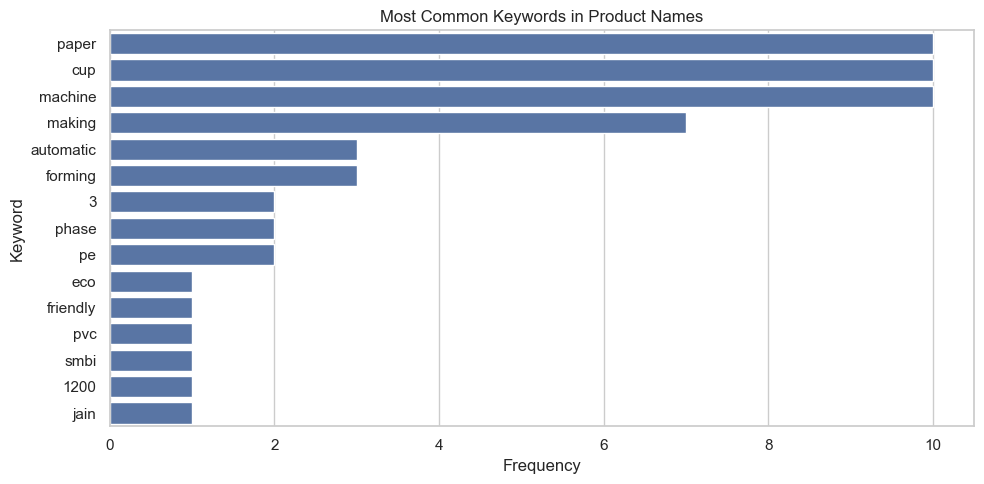

In [12]:
labels, values = zip(*common_words)

plt.figure()
sns.barplot(x=list(values), y=list(labels))
plt.title("Most Common Keywords in Product Names")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

In [13]:
spec_key_counter = Counter()

for spec_dict in df["specs_dict"]:
    for key in spec_dict.keys():
        spec_key_counter[key] += 1

spec_key_counter.most_common(15)

[('Availability', 10),
 ('Automation Grade', 7),
 ('Cup Size', 6),
 ('Brand', 5),
 ('Production Capacity', 5),
 ('Warranty', 5),
 ('Item Condition', 4),
 ('Material Processed', 4),
 ('Machine Weight', 4),
 ('Country of Origin', 3),
 ('Phase', 3),
 ('Voltage', 3),
 ('Production Capacity (cups per hour)', 2),
 ('Capacity', 2),
 ('Dimension', 2)]

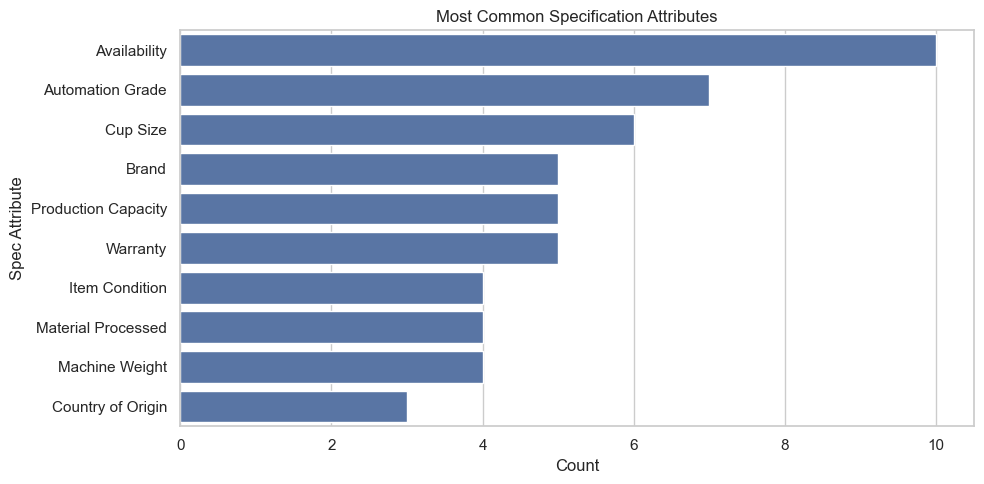

In [14]:
spec_keys, spec_counts = zip(*spec_key_counter.most_common(10))

plt.figure()
sns.barplot(x=list(spec_counts), y=list(spec_keys))
plt.title("Most Common Specification Attributes")
plt.xlabel("Count")
plt.ylabel("Spec Attribute")
plt.tight_layout()
plt.show()

In [17]:
def extract_state(loc):
    if pd.isna(loc):
        return None
    parts = [p.strip() for p in loc.split(",") if p.strip()]
    if not parts:
        return None
    return parts[-1]  # very rough heuristic


df["state"] = df["location_full"].apply(extract_state)

df["state"].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [22]:
state_counts = df["state"].value_counts().head(10)

if state_counts.empty:
    print(
        "No state data available to plot. Check location_full and extract_state logic."
    )
else:
    plt.figure()
    state_counts.plot(kind="bar")
    plt.title("Top Supplier States (Approx.)")
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

No state data available to plot. Check location_full and extract_state logic.


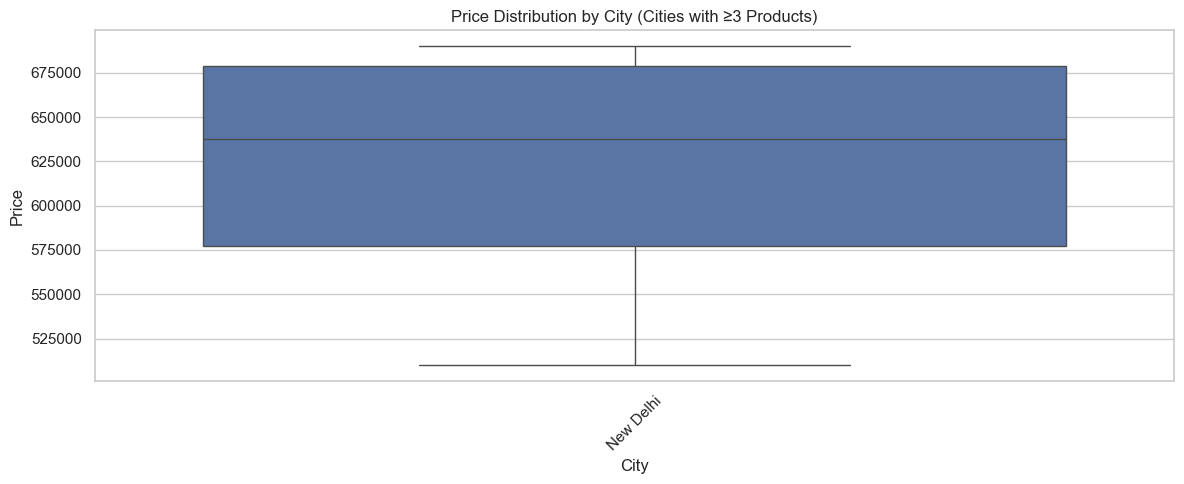

In [19]:
city_counts_full = df["location_city"].value_counts()
valid_cities = city_counts_full[
    city_counts_full >= 3
].index

subset = df[df["location_city"].isin(valid_cities) & df["price_value"].notna()]

plt.figure(figsize=(12, 5))
sns.boxplot(data=subset, x="location_city", y="price_value")
plt.title("Price Distribution by City (Cities with ≥3 Products)")
plt.xlabel("City")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
price_clean = df["price_value"].dropna()

Q1 = price_clean.quantile(0.25)
Q3 = price_clean.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price_value"] < lower_bound) | (df["price_value"] > upper_bound)]
print("Number of price outliers:", outliers.shape[0])

outliers[["product_name", "price_text", "price_value", "location_city"]].head(10)

Number of price outliers: 0


,product_name,price_text,price_value,location_city


In [21]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio

state              1.0
location_full      1.0
gst                0.1
description        0.0
specs_dict         0.0
scraped_at         0.0
company_website    0.0
contact_person     0.0
company_name       0.0
marketplace        0.0
product_name       0.0
location_city      0.0
currency           0.0
price_value        0.0
price_text         0.0
product_url        0.0
specs              0.0
dtype: float64